<h1><center><b>SmartLend<b></center></b></b></h1>
<center><img src= "https://github.com/sujalgupta0008/smartlend/blob/main/images/SMARTLEND_Logo.jpg?raw=true" width= 300 height= 10></center>

## About Dataset:
-> Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.

## Problem:
-> Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Data Source: https://www.kaggle.com/datasets/ninzaami/loan-predication

### ->Importing the dependencies

In [3]:
# import python libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### ->Data Reading and Cleaning/Processing

In [5]:
# Copying the file
loan_copy = pd.read_csv('LOAN.csv')
df = loan_copy.copy()

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Renaming Some Columns
df = df.rename(columns={'Self_Employed': 'Employment', 'ApplicantIncome': 'Applicant_Income','Married':'Marital Status','Dependents':'Dependency'})

In [8]:
# Printing first 5 rows
df.head()

,Loan_ID,Gender,Marital Status,Dependency,Education,Employment,Applicant_Income,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# Checking No.of rows and columns
df.shape

(614, 13)

In [10]:
# Getting Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Marital Status     611 non-null    object 
 3   Dependency         599 non-null    object 
 4   Education          614 non-null    object 
 5   Employment         582 non-null    object 
 6   Applicant_Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#Checking For Missing Values
df.isnull()

,Loan_ID,Gender,Marital Status,Dependency,Education,Employment,Applicant_Income,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Marital Status        3
Dependency           15
Education             0
Employment           32
Applicant_Income      0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling Missing Values

In [14]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [15]:
df['Gender'].fillna(df['Gender'].mode().values[0],inplace=True)

In [16]:
df['Marital Status'].mode()

0    Yes
Name: Marital Status, dtype: object

In [17]:
df['Marital Status'].fillna(df['Marital Status'].mode().values[0],inplace=True)

In [18]:
df['Dependency'].mode()

0    0
Name: Dependency, dtype: object

In [19]:
df['Dependency'].fillna(df['Dependency'].mode().values[0],inplace=True)

In [20]:
df['Employment'].mode()

0    No
Name: Employment, dtype: object

In [21]:
df['Employment'].fillna(df['Employment'].mode().values[0],inplace=True)

In [22]:
df['LoanAmount'].mean()

146.41216216216216

In [23]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [24]:
df['Loan_Amount_Term'].mean()

342.0

In [25]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [26]:
df['Credit_History'].mean()

0.8421985815602837

In [27]:
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [28]:
# Finally Checking Missing Values
df.isnull().sum()

Loan_ID              0
Gender               0
Marital Status       0
Dependency           0
Education            0
Employment           0
Applicant_Income     0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Checking Duplicates

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [30]:
df.duplicated().sum()

0

In [31]:
# Checking for unique values
df.nunique()

Loan_ID              614
Gender                 2
Marital Status         2
Dependency             4
Education              2
Employment             2
Applicant_Income     505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [32]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [33]:
df['Dependency'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [34]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [35]:
df['Employment'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
# Describing The Data
df.describe()

,Applicant_Income,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# ->Exploratry Data Analysis (EDA)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Marital Status     614 non-null    object 
 3   Dependency         614 non-null    object 
 4   Education          614 non-null    object 
 5   Employment         614 non-null    object 
 6   Applicant_Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [39]:
# Reading Columns
df.columns

Index(['Loan_ID', 'Gender', 'Marital Status', 'Dependency', 'Education',
       'Employment', 'Applicant_Income', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

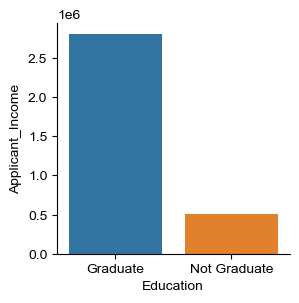

In [40]:
# Plotting graph between Education VS Total_Income
total_income = df.groupby(['Education'],as_index=False)['Applicant_Income'].sum()
plt.figure(figsize=(3,3))
sns.barplot(x='Education',y='Applicant_Income',data=total_income,palette="tab10")
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> Income of Graduated People are more than Not Graduated People

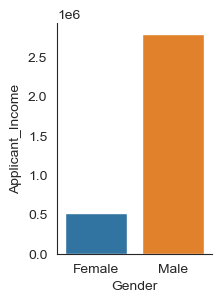

In [42]:
# Plotting graph between Gender VS Applicant_Income
total_income = df.groupby(['Gender'],as_index=False)['Applicant_Income'].sum()
plt.figure(figsize=(2,3))
sns.barplot(x='Gender',y='Applicant_Income',data=total_income,palette="tab10")
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> On the basis of gender male earn more than female

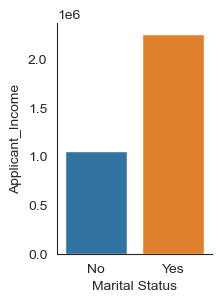

In [44]:
# Plotting graph between Marital Status VS Applicant_Income
total_income = df.groupby(['Marital Status'],as_index=False)['Applicant_Income'].sum()
plt.figure(figsize=(2,3))
sns.barplot(x='Marital Status',y='Applicant_Income',data=total_income,palette="tab10")
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> On the basis of marital status married people earn more than unmarried people

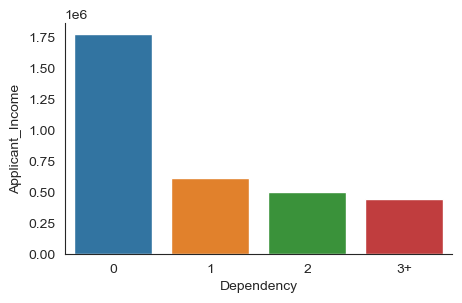

In [46]:
# Plotting graph between Dependency VS Applicant_Income
total_income = df.groupby(['Dependency'],as_index=False)['Applicant_Income'].sum()
plt.figure(figsize=(5,3))
sns.barplot(x='Dependency',y='Applicant_Income',data=total_income,palette="tab10")
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> Dependency and Applicant_Income are inversely propotional. <br>
-> More the Dependency lesser the Income and Vice-Versa.

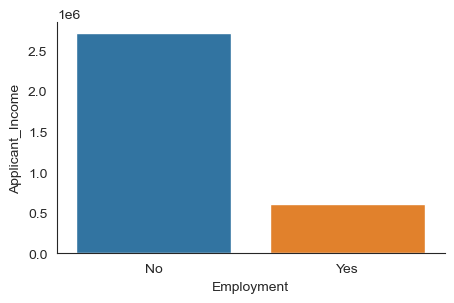

In [48]:
# Plotting graph between Employment VS Applicant_Income
total_income = df.groupby(['Employment'],as_index=False)['Applicant_Income'].sum()
plt.figure(figsize=(5,3))
sns.barplot(x='Employment',y='Applicant_Income',data=total_income,palette="tab10")
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> Surprisingly Unemployed people earn more than Employed People

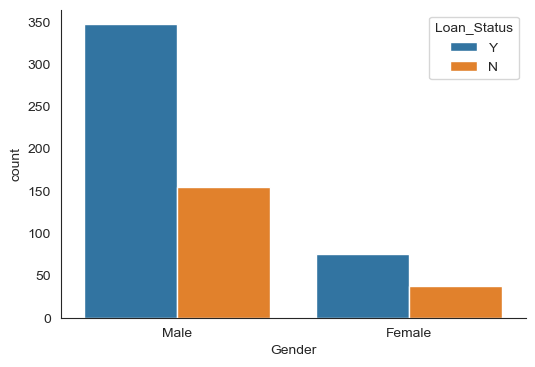

In [50]:
# plotting graph between (NO. of times male and female appply) VS Loan Approval
plt.figure(figsize=(6,4))
sns.countplot(x='Gender' ,data=df,hue='Loan_Status')
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> Males were approved for loans maximum time they applied. <br>
-> Females were not approved for loans maximum time they applied.

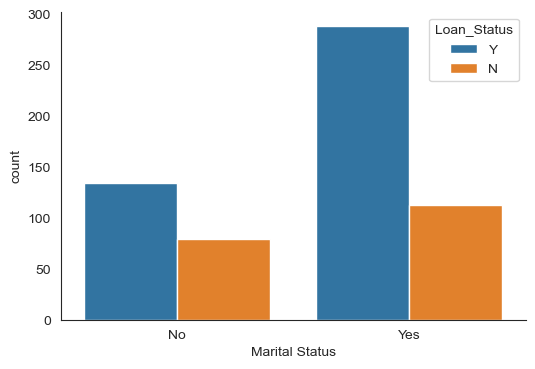

In [52]:
# Plotting Graph between (NO. of times Married and Unmarried people Apply) VS Loan Approval
plt.figure(figsize=(6,4))
sns.countplot(x='Marital Status' ,data=df,hue='Loan_Status')
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> Married people were approved for loans maximum time they applied. <br>
-> Unmarried people were not approved for loans maximum time they applied.

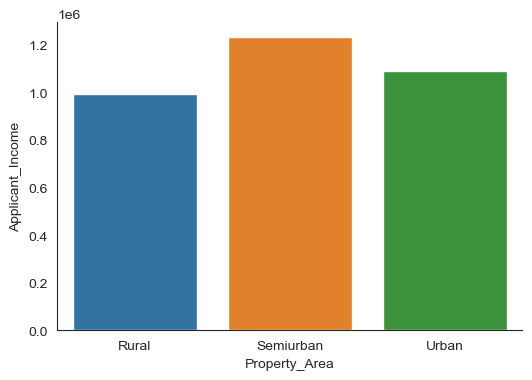

In [54]:
# Plotting graph between Property_Area VS Applicant_Income
total_income = df.groupby(['Property_Area'],as_index=False)['Applicant_Income'].sum()
plt.figure(figsize=(6,4))
sns.barplot(x='Property_Area',y='Applicant_Income',data=total_income,palette="tab10")
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> People from semiurban area earn more than urban and rural.

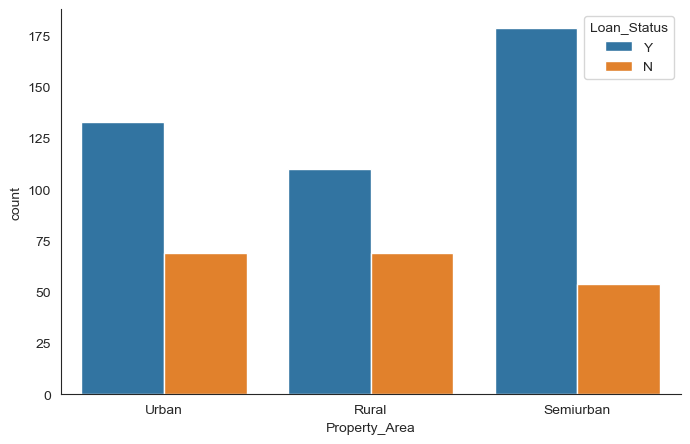

In [56]:
# plotting graph between (NO. of times people appplied from urban,semiurban,rural) VS Loan Approval
plt.figure(figsize=(8,5))
sns.countplot(x='Property_Area' ,data=df,hue='Loan_Status')
sns.despine()
sns.set_style('white')
plt.show()

Conclusion: <br>
-> No. of times people applied from semiurban area are approved for loan comparing with rural and urban

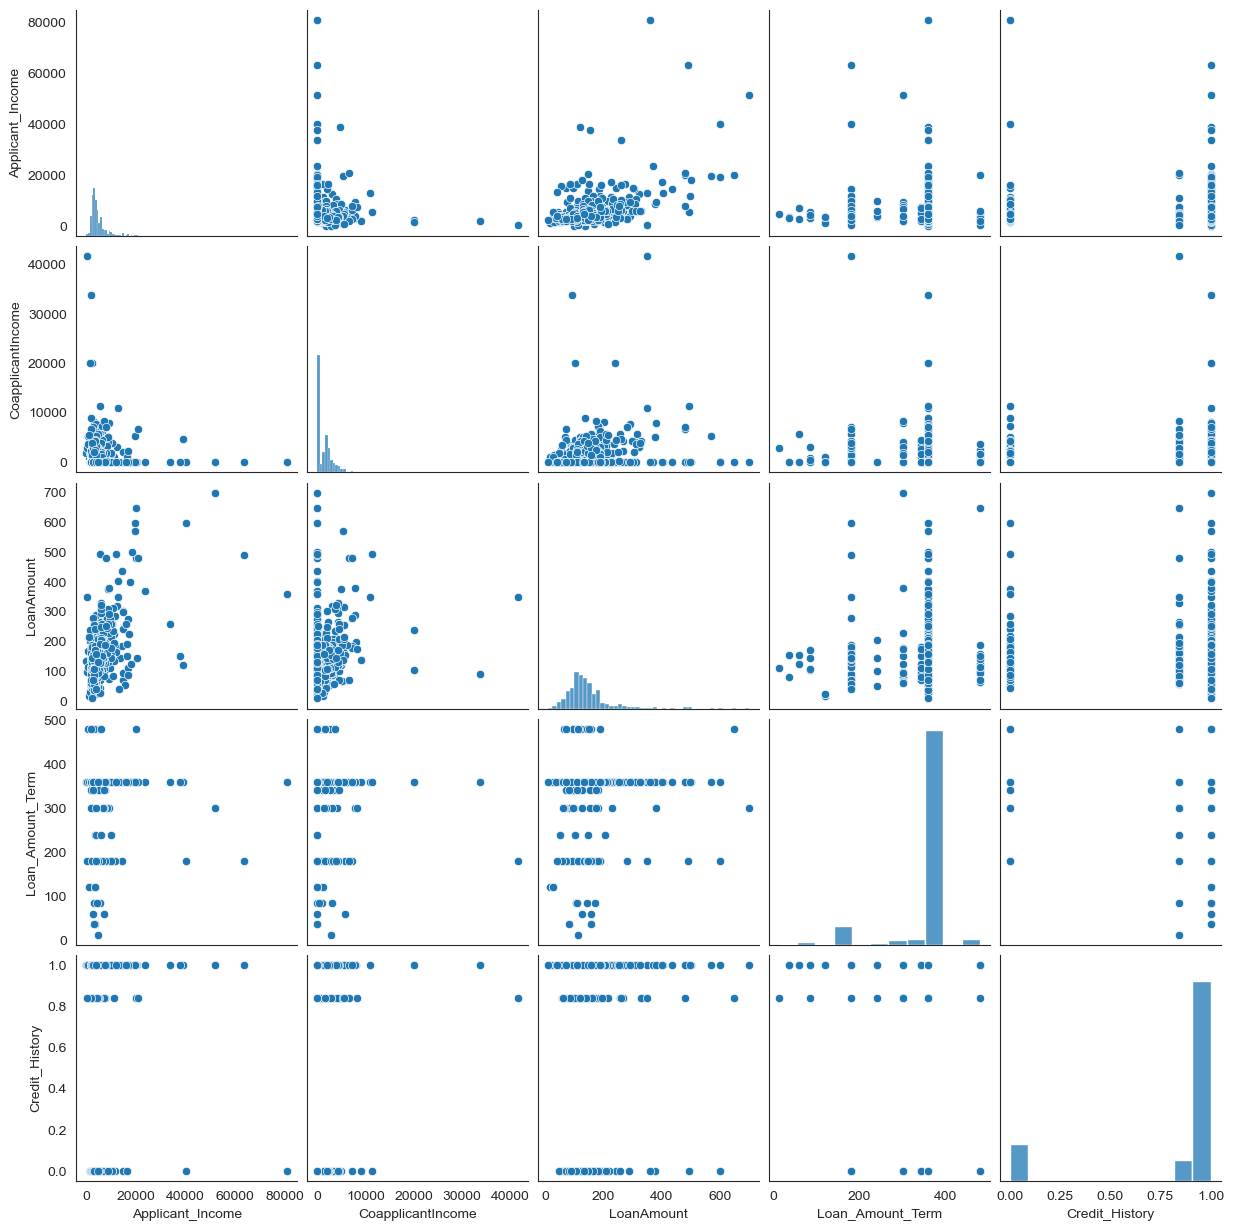

In [58]:
# Realtionship between each and every feature
sns.pairplot(df)
plt.show()

In [59]:
# exporting cleaned dataset
df.to_csv('loan_data_cleaned.csv')